<a href="https://colab.research.google.com/github/PaolaPina3228/Simulaci-n-2/blob/main/Metropolis_3_distribuciones_estad%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Distribucion normal***



In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [114]:
#Simular una normal con el algoritmo de Metropolis-Hastings
def normal(x,mu,std):
  return (1/np.sqrt(2*np.pi*std**2))*np.exp(-(x-mu)**2/(2*std**2))

In [115]:
#Media y desviacion estandar
mu= 0.2
sigma= 0.1

In [116]:
delta= 0.5

In [117]:
n= 50000
x_norm= np.zeros(n)
x_norm[0]= 0
acept= 0

#Algoritmo de Metropolis
for i in range(0, n-1):
  y= x_norm[i]+np.random.uniform(-delta,delta)
  if np.random.rand() < min(1,normal(y,mu,sigma)/normal(x_norm[i],mu,sigma)):
    x_norm[i+1]= y
    acept+= 1
  else:
    x_norm[i+1]= x_norm[i]

print ("La aceptación fue del ", acept/n*100, "%")

La aceptación fue del  31.588 %


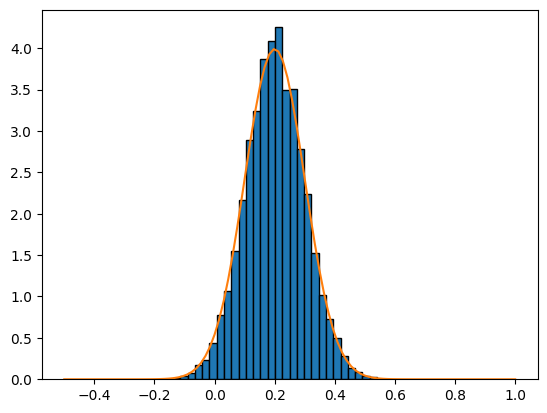

In [118]:
#Grafica
plt.hist(x_norm, bins= 30, density= True, edgecolor='black')
xs= np.linspace(-0.5,1,100)
plt.plot(xs, normal(xs,mu,sigma))
plt.show()

In [119]:
#Media y desciación estandar
print (np.mean(x_norm))
print (np.std(x_norm))

0.20099209849763222
0.09800027674819606


# ***Distribucion exponencial***

In [120]:
#Simular una exponencial con el algoritmo de Metropolis-Hastings
def exponencial(x, lam):
  if x>0:
    return lam*np.exp(-lam*x)
  else:
    return 0

In [121]:
# Parámetros de la distribución exponencial (lambda)
lam = 0.5

In [122]:
delta_e= 10

In [123]:
n= 50000
x_exp = np.zeros(n)
x_exp[0]= 1
acept_e= 0

#Algoritmo de Metropolis
for i in range(0, n-1):
  y = x_exp[i] + np.random.uniform(-delta_e, delta_e)
  if np.random.rand() < min(1, exponencial(y, lam) / exponencial(x_exp[i], lam)):
    x_exp[i+1] = y
    acept_e += 1
  else:
    x_exp[i+1] = x_exp[i]

print ("La aceptación fue del ", acept/n*100, "%")

La aceptación fue del  31.588 %


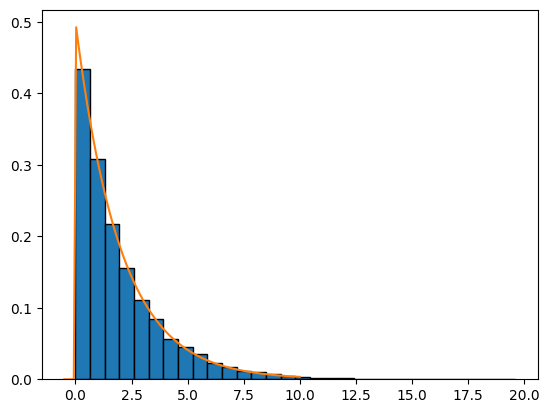

In [124]:
#Grafica
plt.hist(x_exp, bins= 30, density= True, edgecolor='black')
xs= np.linspace(-0.5,10,100)
plt.plot(xs, [exponencial(x, lam) for x in xs])
plt.show()

In [125]:
#Media y desciación estandar
print(np.mean(x_exp))
print(np.std(x_exp))

2.0132623693150666
2.0242355440436812


# ***Distribucion uniforme***

In [126]:
#Simular una distribución uniforme con el algoritmo de Metropolis-Hastings
def uniforme(x, a, b):
  if a <= x <= b:
    return 1 / (b - a)
  else:
    return 0

In [127]:
#Parámetros de la distribución uniforme
a = 2
b = 5

In [128]:
delta_u = 1

In [129]:
x_unif = np.zeros(n)
x_unif[0] = 3
acept_u = 0

# Algoritmo de Metropolis
for i in range(n - 1):
  y = x_unif[i] + np.random.uniform(-delta_u, delta_u)
  if np.random.rand() < min(1, uniforme(y, a, b) / uniforme(x_unif[i], a, b)):
    x_unif[i + 1] = y
    acept_u += 1
  else:
    x_unif[i + 1] = x_unif[i]

print("La aceptación fue del ", acept_u / n * 100, "%")

La aceptación fue del  83.308 %


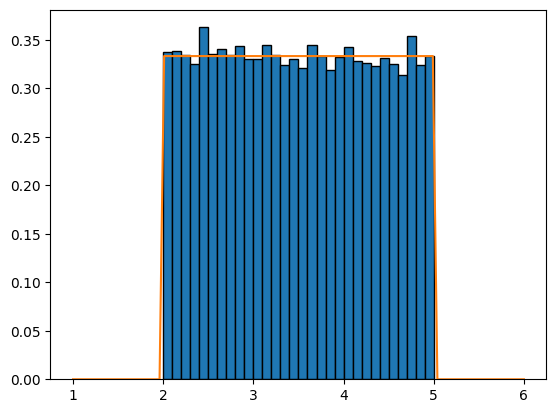

In [130]:
# Gráfica
plt.hist(x_unif, bins=30, density=True, edgecolor='black')
xs = np.linspace(a - 1, b + 1, 100)
plt.plot(xs, [uniforme(x, a, b) for x in xs])
plt.show()

In [131]:
#Media y desciación estandar
print(np.mean(x_unif))
print(np.std(x_unif))

3.4913932720915337
0.8670322767873272


# ***Distribucion beta***

In [132]:
def beta_dist(x, alpha, bet):
  return beta.pdf(x, alpha, bet)

In [133]:
#Parámetros de la distribución beta (alpha y beta)
alpha = 2
bet = 5

In [134]:
delta_b = 0.1

In [135]:
n = 50000
x_beta = np.zeros(n)
x_beta[0] = 0.5
acept_b = 0

# Algoritmo de Metropolis
for i in range(0, n-1):
  y = x_beta[i] + np.random.uniform(-delta_b, delta_b)
  if 0 < y < 1:
    if np.random.rand() < min(1, beta_dist(y, alpha, bet) / beta_dist(x_beta[i], alpha, bet)):
      x_beta[i+1] = y
      acept_b += 1
    else:
      x_beta[i+1] = x_beta[i]
  else:
    x_beta[i+1] = x_beta[i]

print("La aceptación fue del ", acept_b/n*100, "%")

La aceptación fue del  87.872 %


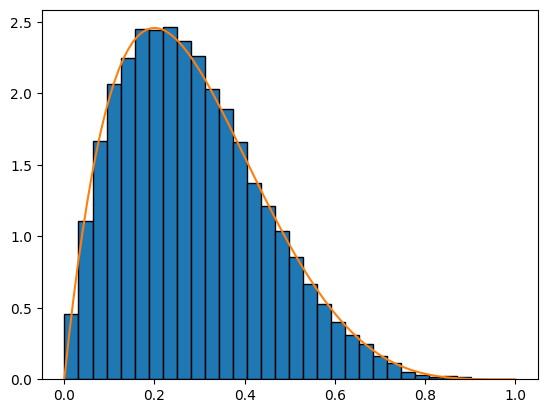

In [136]:
# Gráfica
plt.hist(x_beta, bins=30, density=True, edgecolor='black')
xs = np.linspace(0, 1, 100)
plt.plot(xs, [beta_dist(x, alpha, bet) for x in xs])
plt.show()

In [137]:
#Media y desciación estandar
print(np.mean(x_beta))
print(np.std(x_beta))

0.28469207900323434
0.1578998295271868
